In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..\\..")
sys.path.append("..")

In [38]:
from uilc import PositionArray
from uilc.methods import pw
from uilc.utils import radiation, convolution
from uilc.utils.misc import csym_index

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from scipy.optimize import nnls, lsq_linear
from scipy import linalg
from scipy import ndimage
from scipy.interpolate import interp1d
from scipy.fft import fft, fftfreq, ifft
from copy import deepcopy
from scipy.ndimage import convolve

import fnnls

In [211]:
#Optical system setting
cm = 1E-2
s = 2
alpha = np.array([2.5, 3]) # W/H
H = 0.1*cm
W = alpha * H
print("System parameters:=========")
print("Lambertian:", s)
print("Ratio, x, y:", alpha)
print(f"H:{H}, W:{W}")

System parameters:=========
Lambertian: 2
Ratio, x, y: [2.5 3. ]
H:0.001, W:[0.0025 0.003 ]


In [212]:
dr =  W[1]/ W[0]
#n,m = nmax
m = 40
n = int(m * 1/dr)
dx = W[0]/n
dy = W[1]/m
l = 2*n -1
k = 2*m - 1

In [230]:
sources_random  = np.random.rand(n, m)
sources_random  = np.where(sources_random > 0.99, 1, 0 )

#sources_random  = np.zeros(n*m).reshape(n, m)
#
#for i in range(0, n):
#    for j in range(0, m):
#        if i%6 ==0 and j %10 == 0:
#            sources_random[i,j] = 1

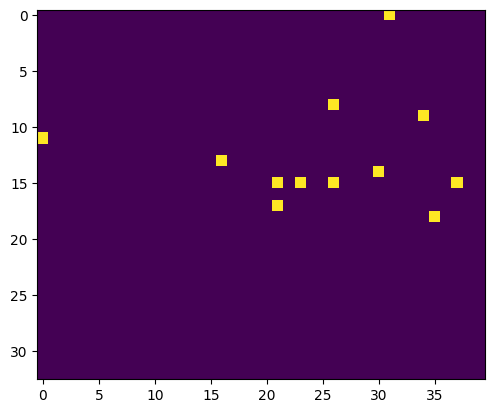

In [231]:
plt.imshow(sources_random)

In [232]:
def pos_n(i, j, n, m, dx ,dy):
    return (dx*(n-i))**2 + (dy*(m-j))**2

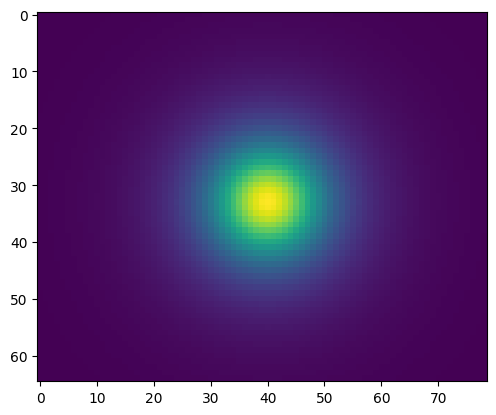

In [233]:
filter2=np.fromfunction(
    lambda i, j: radiation.lambertian(0, np.sqrt(pos_n(i, j, n, m, dx ,dy)), s, H), 
    (l,k), dtype=float)
plt.imshow(filter2)

In [234]:
filter2[n, m]

1000000.0

In [235]:
filter2.shape

(65, 79)

In [236]:
(n, m)

(33, 40)

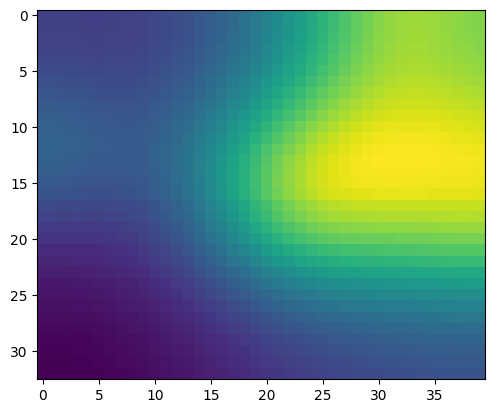

In [237]:
illumination = convolve(sources_random, filter2)
plt.imshow(illumination)

In [238]:
A = convolution.get_matrix_system(filter2, (n, m))
A = A/A.max()
illum_v = illumination.reshape(-1)
dim_l = A.shape[0]


In [239]:
A.shape

(1320, 1320)

In [240]:
A_r = A[0]
A_c = A[:, 0]

In [241]:
sol_nnls = nnls(A, illum_v, maxiter = 10*A.shape[1])

In [242]:
sol_nnls_mat= sol_nnls[0].reshape((n, m))

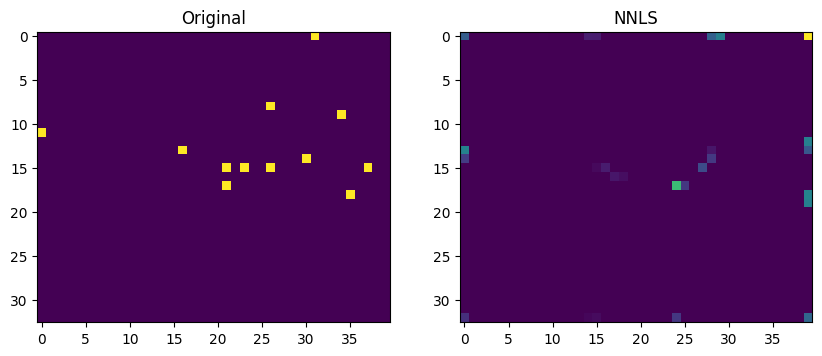

In [243]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.imshow(sources_random)
ax1.set_title("Original")
ax2.imshow(sol_nnls_mat)
ax2.set_title("NNLS")

plt.show()

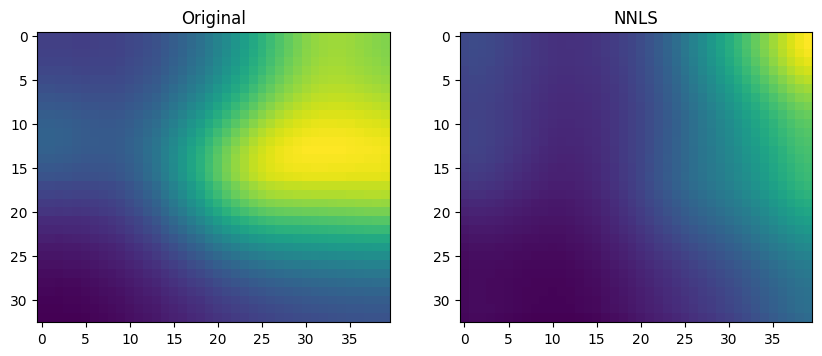

In [244]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 2,  1)
ax2 = fig.add_subplot(1, 2,  2)

c1 = convolve(sources_random, filter2)
c2 = convolve(sol_nnls_mat, filter2)

ax1.imshow(c1)
ax2.imshow(c2)

ax1.set_title("Original")
ax2.set_title("NNLS")


plt.show()

---

Wolfram solver

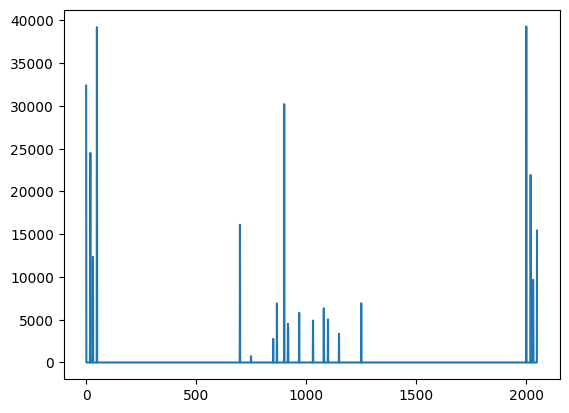

In [526]:
y = sol[0]
x= np.arange(0, len(y))
plt.plot(x, y)

In [528]:
median = np.median(y[y>0])
cutting = np.where(y >=median, median, y)
cut_mat = cutting.reshape((n, m))
plt.imshow(cut_mat)

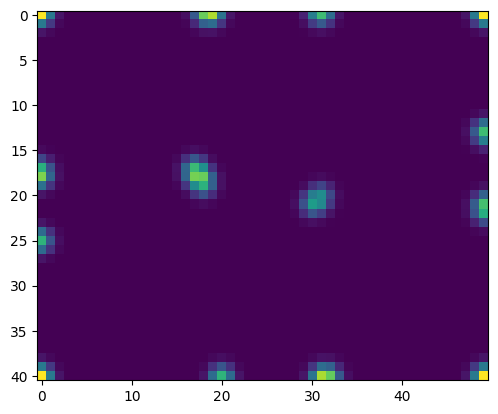

In [530]:
plt.imshow(ndimage.gaussian_filter(cut_mat, sigma=0.9))

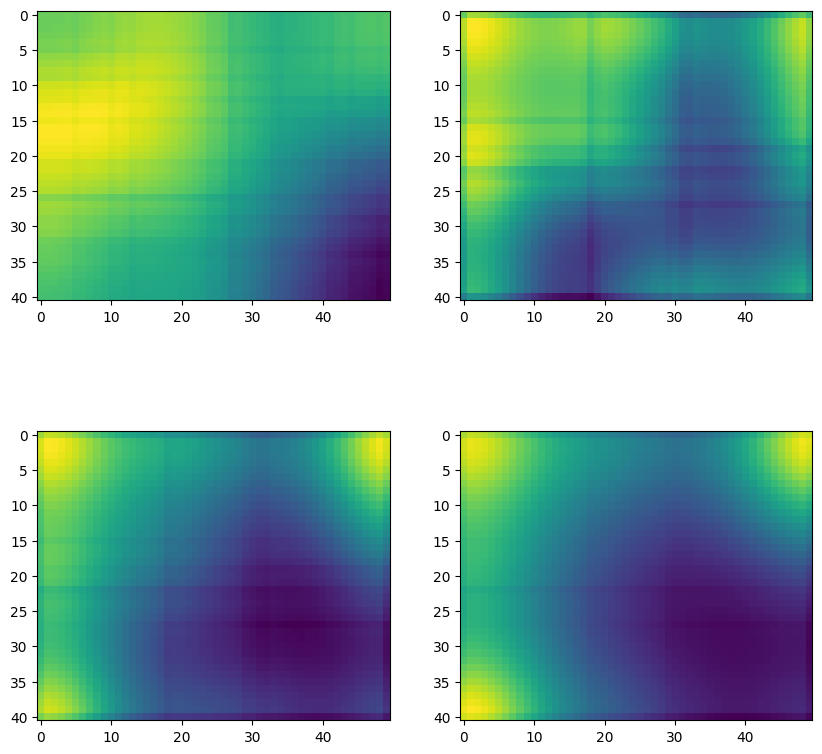